In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import matplotlib.pyplot as plt


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install pandas openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_excel("yonelimfinal.xlsx")


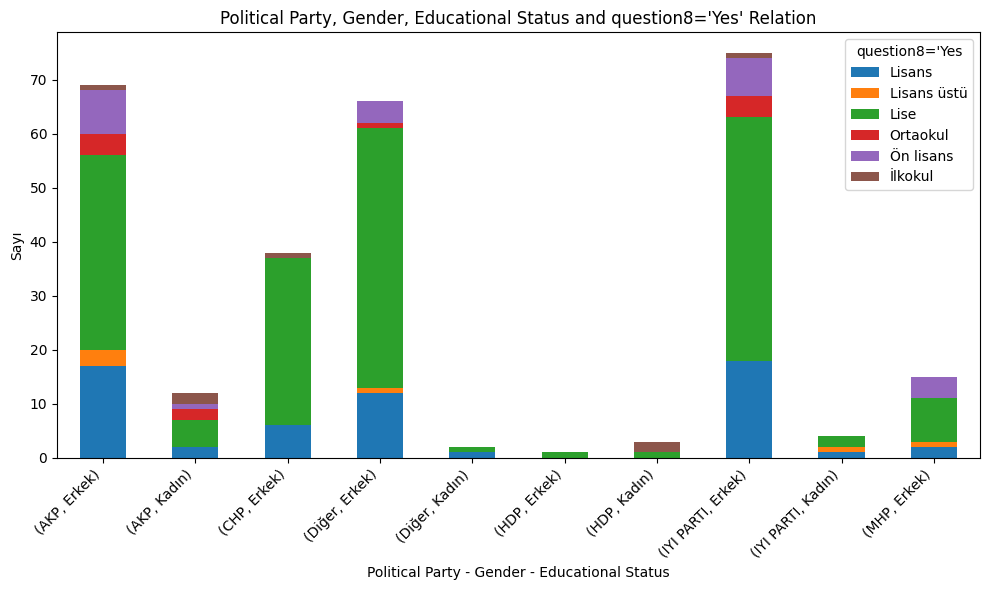

In [ ]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

filtre = df["soru8"] == "Evet"
evet_yanitlari = df[filtre]
veri = evet_yanitlari[["parti", "Cinsiyet", "Egitim", "soru8"]]

pivot_table = veri.groupby(["parti", "Cinsiyet", "Egitim"]).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind="bar", stacked=True, ax=ax)

ax.set_xlabel("Political Party - Gender - Educational Status")
ax.set_ylabel("Sayı")
ax.set_title("Political Party, Gender, Educational Status and question8='Yes' Relation")

plt.xticks(rotation=45, ha="right")
plt.legend(title="question8='Yes", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


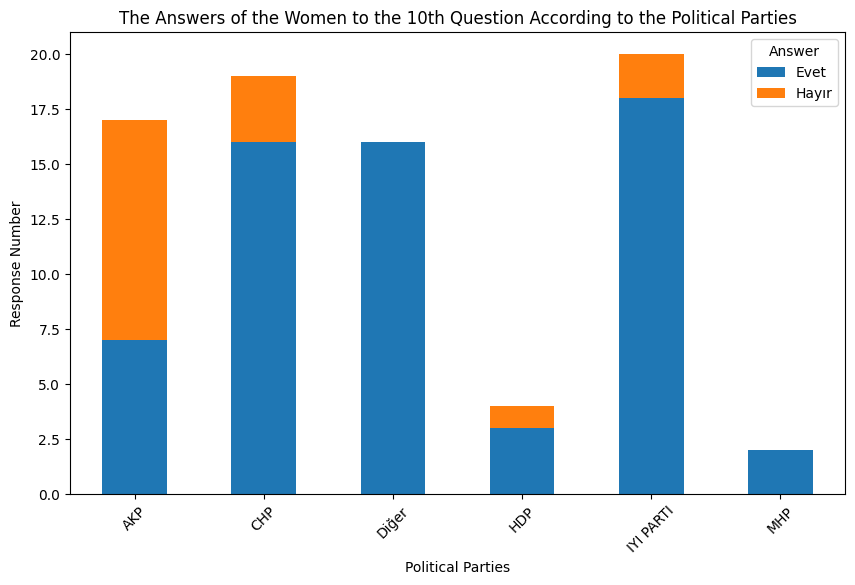

In [ ]:
kadınlar = df[df['Cinsiyet'] == 'Kadın']
partiler = kadınlar['parti']
soru10_cevaplar = kadınlar['soru10']

cevap_sayilari = soru10_cevaplar.groupby(partiler).value_counts().unstack().fillna(0)


cevap_sayilari.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Political Parties')
plt.ylabel('Response Number')
plt.title('The Answers of the Women to the 10th Question According to the Political Parties')
plt.legend(title='Answer')
plt.xticks(rotation=45)
plt.show()

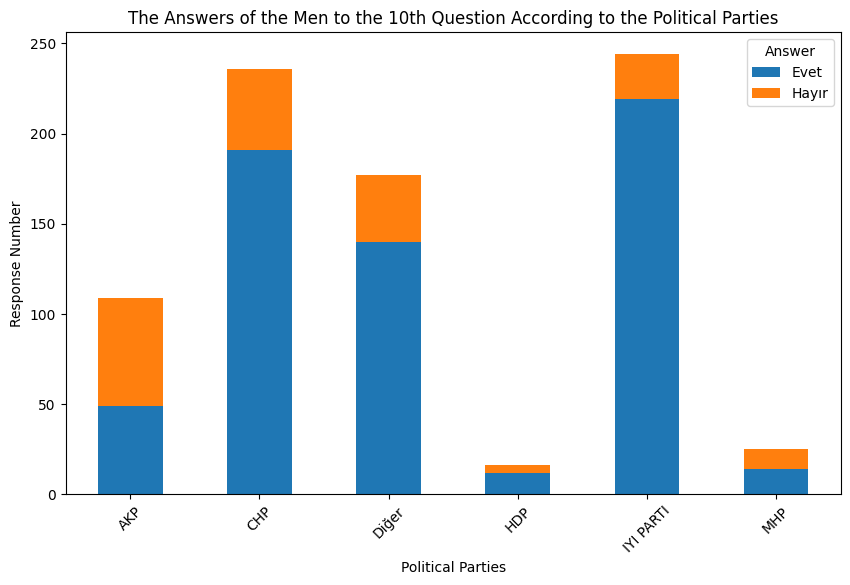

In [ ]:
kadınlar = df[df['Cinsiyet'] == 'Erkek']
partiler = kadınlar['parti']
soru10_cevaplar = kadınlar['soru10']

cevap_sayilari = soru10_cevaplar.groupby(partiler).value_counts().unstack().fillna(0)


cevap_sayilari.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Political Parties')
plt.ylabel('Response Number')
plt.title('The Answers of the Men to the 10th Question According to the Political Parties')
plt.legend(title='Answer')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [ ]:
df = df.sample(n=400, random_state=42)
df = df.dropna()
X = df[['Cinsiyet', 'Yas', 'Bolge', 'Egitim', 'soru1', 'soru2', 'soru3', 'soru4', 'soru5', 'soru6', 'soru7', 'soru8', 'soru9', 'soru10']]
y = df['parti']
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.35


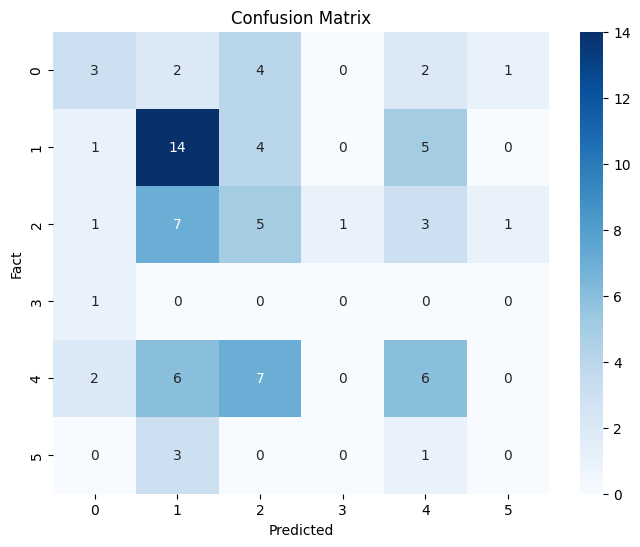

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Fact')
plt.title('Confusion Matrix')
plt.show()

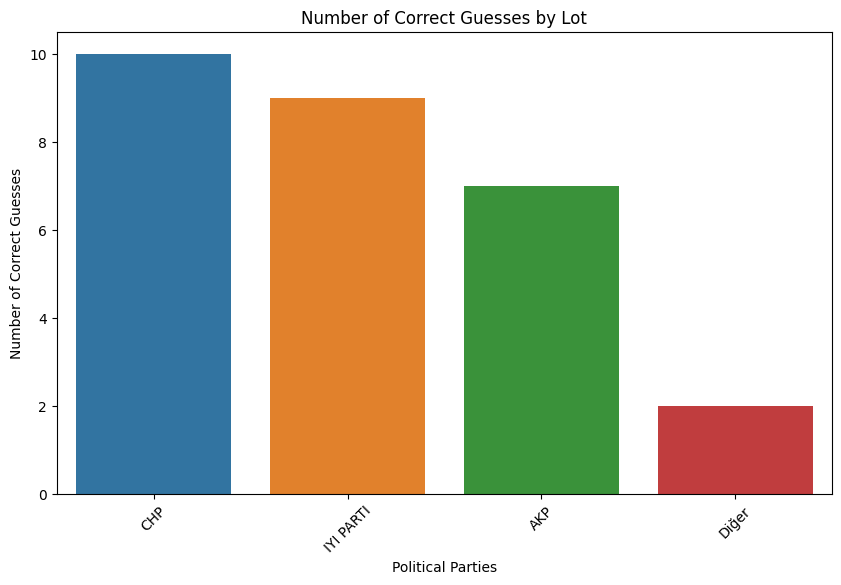

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

correct_predictions = results[results['y_test'] == results['y_pred']]
party_counts = correct_predictions['y_test'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=party_counts.index, y=party_counts.values)
plt.xlabel('Political Parties')
plt.ylabel('Number of Correct Guesses')
plt.title('Number of Correct Guesses by Lot')
plt.xticks(rotation=45)
plt.show()